# ADS Capstone Project: Airbnb Pricing Prediction
#### By Renetta Nelson, Michael Nguyen and Jacqueline Urenda

# Exploratory Data Analysis

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Datasets

In [2]:

%store -r calendar
%store -r weather
%store -r listings
%store -r final_df



#### Exploring Calendar Dataset

In [3]:
calendar.describe()

,listing_id,available,price,minimum_nights,maximum_nights
count,5.173672e+06,5.173672e+06,5.173672e+06,5.173672e+06,5.173672e+06
mean,1.598379e+17,5.060578e-01,3.963504e+02,7.516183e+00,3.037483e+05
std,2.767907e+17,4.999634e-01,1.185316e+03,2.054652e+01,2.550710e+07
min,2.996700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.501354e+07,0.000000e+00,1.250000e+02,2.000000e+00,3.650000e+02
50%,4.540952e+07,1.000000e+00,2.120000e+02,3.000000e+00,1.125000e+03
75%,5.223218e+17,1.000000e+00,3.990000e+02,5.000000e+00,1.125000e+03
max,7.181068e+17,1.000000e+00,1.000000e+05,9.990000e+02,2.147484e+09


Looking at the average daily pricing:

In [4]:
#looking at average price per day

average_price = calendar.groupby('date')['price'].mean()

average_price.head()

date
2022-09-18    349.385117
2022-09-19    326.593900
2022-09-20    326.956728
2022-09-21    329.524961
2022-09-22    338.543090
Name: price, dtype: float64

<AxesSubplot:title={'center':'Average Daily Pricing'}, xlabel='Date', ylabel='Price (USD)'>

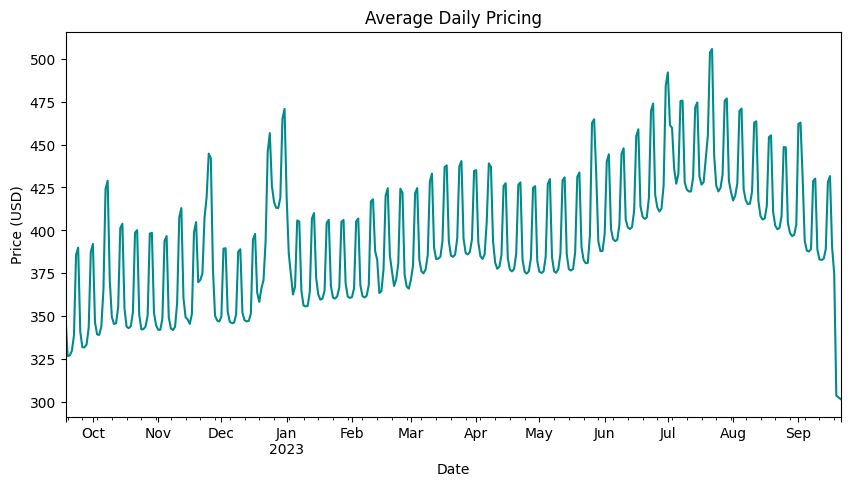

In [5]:
#Time Series plot of the average daily pricing
average_price.plot(figsize=(10,5), title='Average Daily Pricing', xlabel="Date", ylabel="Price (USD)", color = "darkcyan")

There seems to be a general increase trend going into holiday season in November and December. This makes sense as people tend to travel and vacation at the end of the year during the holidays. There's also an increasing trend through the summer period with pricing peaking some time between July and and August. These are most likely the most popular month for travel in San Diego. There also seems to be some cycles based on this figure. Pricing seems to go up and down pretty frequently. This probably is due to weekday's being cheaper pricing and weekends having higher pricing. 

In [6]:
available_values = calendar.available.value_counts()

<AxesSubplot:title={'center':'Count of Listing Availability Status'}, xlabel='Count', ylabel='Available Status'>

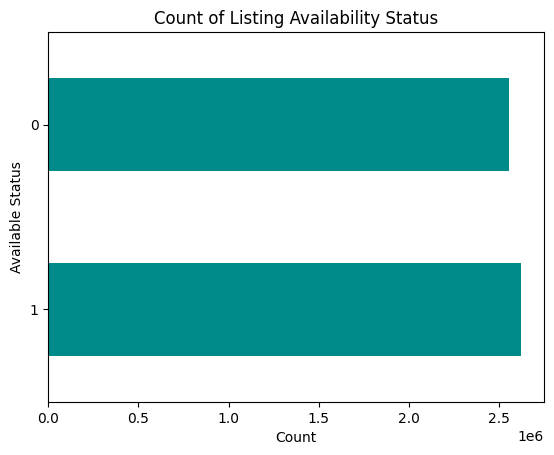

In [7]:
available_values.plot(kind='barh', title='Count of Listing Availability Status', xlabel="Count", ylabel="Available Status", color='darkcyan')

Almost even distribution for this feature

#### Exploring Weather Dataset

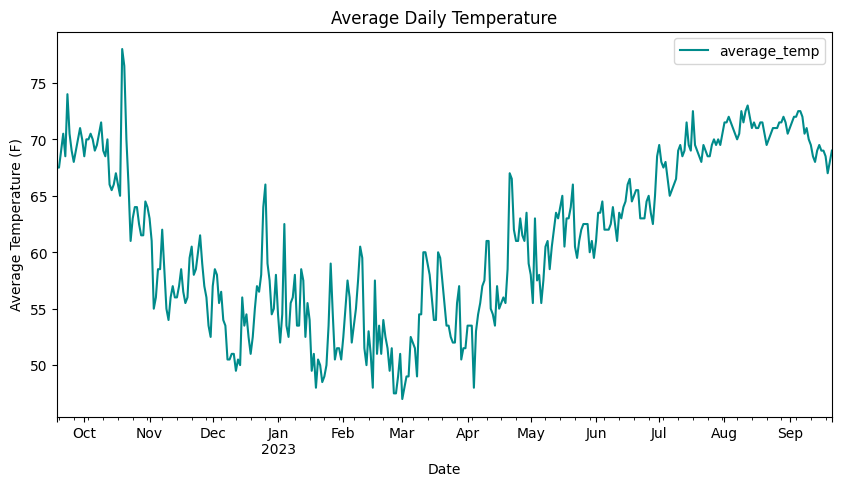

In [10]:
average_temp = weather.plot(x="date", y="average_temp", figsize=(10,5), title='Average Daily Temperature', xlabel="Date", ylabel="Average Temperature (F)", color = "darkcyan")

#### Exploring Listings Dataset

In [11]:
# looking at review scores distributions

listings_reviews = listings[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]]

array([[<AxesSubplot:title={'center':'review_scores_rating'}>,
        <AxesSubplot:title={'center':'review_scores_accuracy'}>,
        <AxesSubplot:title={'center':'review_scores_cleanliness'}>],
       [<AxesSubplot:title={'center':'review_scores_checkin'}>,
        <AxesSubplot:title={'center':'review_scores_communication'}>,
        <AxesSubplot:title={'center':'review_scores_location'}>],
       [<AxesSubplot:title={'center':'review_scores_value'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

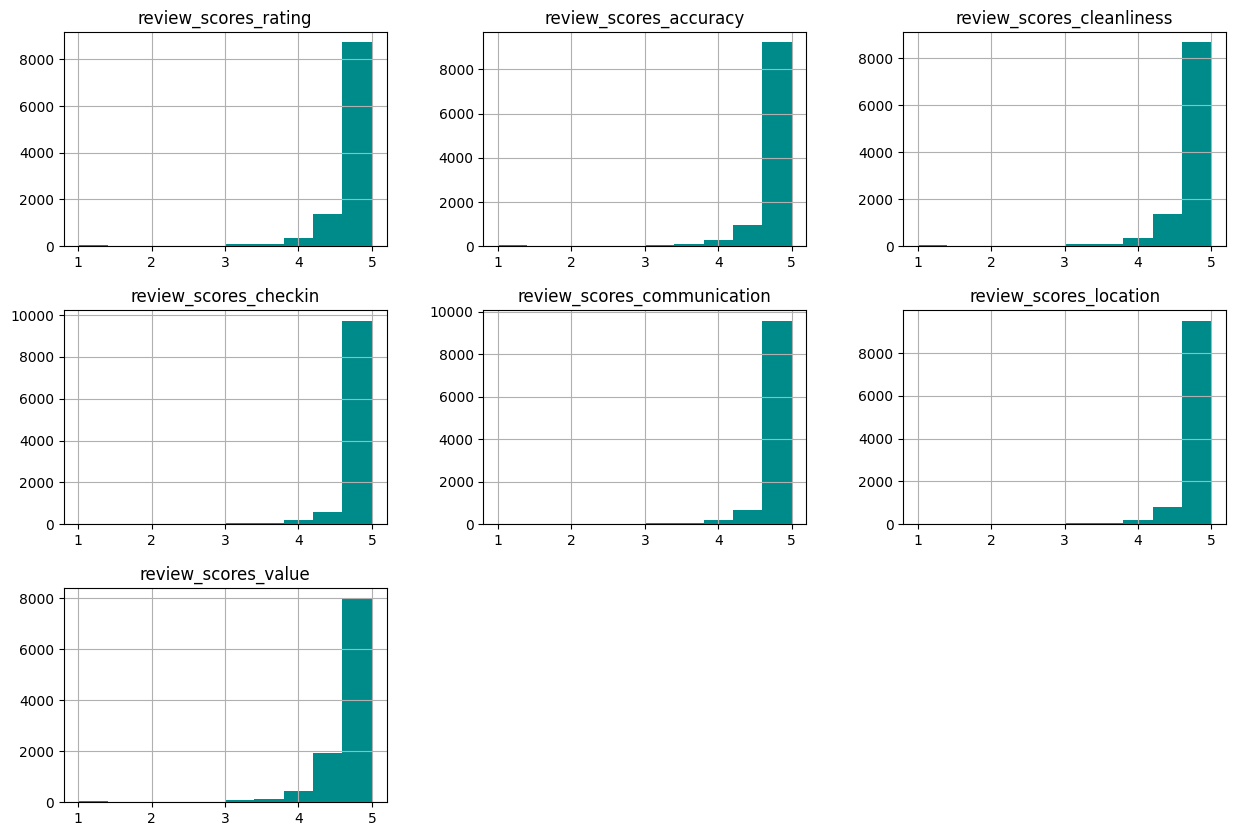

In [12]:
#Histograms of reviews scores
listings_reviews.hist(color = "darkcyan", figsize=(15,10))


Looking at property and room type feature:

In [22]:
property_type_values = listings.property_type.value_counts()


In [23]:
room_type_values = listings.room_type.value_counts()

There are 78 total different property types. Perhaps it would be good to narrow down or remove property types that have few counts

<AxesSubplot:title={'center':'Top 10 Property Types'}, xlabel='Count', ylabel='Property Types'>

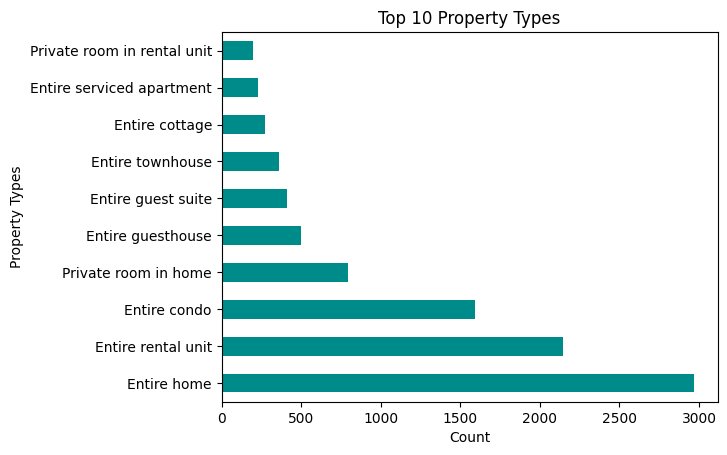

In [24]:
property_type_values = property_type_values.sort_values(ascending=False).head(10)
property_type_values.plot(kind='barh', title='Top 10 Property Types', xlabel="Count", ylabel="Property Types", color='darkcyan')

<AxesSubplot:title={'center':'Room Types'}, xlabel='Count', ylabel='Room Types'>

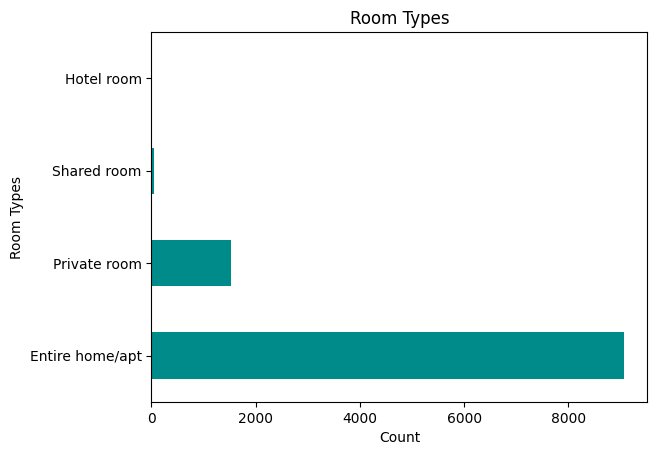

In [25]:
room_type_values = room_type_values.sort_values(ascending=False).head(10)
room_type_values.plot(kind='barh', title='Room Types', xlabel="Count", ylabel="Room Types", color='darkcyan')

Top property types include "Entire home", "Entire rental unit", "Entire condo"

In [26]:
neighborhood_values = listings.host_neighbourhood.value_counts()

<AxesSubplot:title={'center':'Top 10 Neighborhoods With Most Listings'}, xlabel='Count', ylabel='Neighborhoods'>

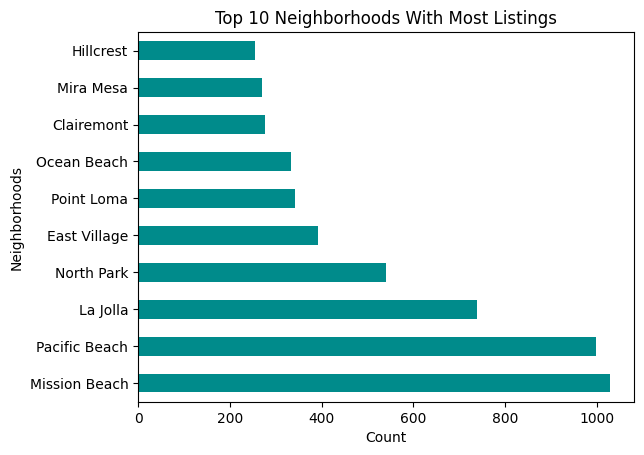

In [27]:
# Top 10 Neighborhoods

neighborhood_values = neighborhood_values.sort_values(ascending=False).head(10)
neighborhood_values.plot(kind='barh', title='Top 10 Neighborhoods With Most Listings', xlabel="Count", ylabel="Neighborhoods", color='darkcyan')

Top neighborhoods with most listings include Mission Beach, Pacific Beach, and La Jolla